In [1]:
import pandas as pd


In [2]:
! pip install ucimlrepo

# Data Downloading

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

# Data Preprocessing

In [4]:
df = pd.concat([X, y], axis=1)

In [5]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


# Data visualisation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

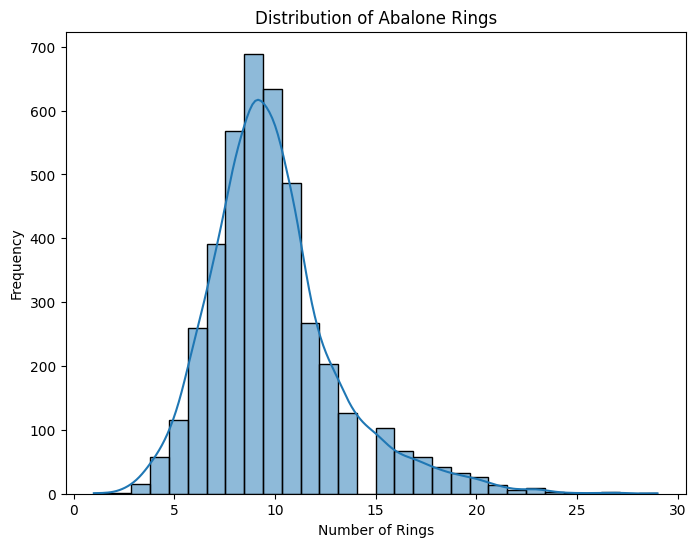

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rings'], bins=30, kde=True)
plt.title('Distribution of Abalone Rings')
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.show()

In [11]:
!pip install plotly

In [12]:
import plotly.express as px

fig = px.scatter(df, x='Length', y='Diameter', color='Rings',
                 hover_data=['Sex'], title='Interactive Scatter Plot')
fig.show()

In [13]:
fig = px.scatter_3d(df, x='Length', y='Diameter', z='Height',
                    color='Rings', title='3D Scatter Plot')
fig.show()

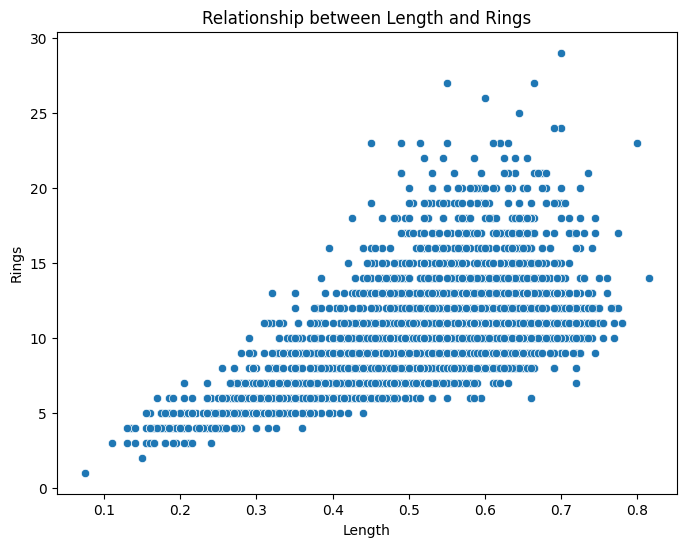

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Length', y='Rings', data=df)
plt.title('Relationship between Length and Rings')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.show()

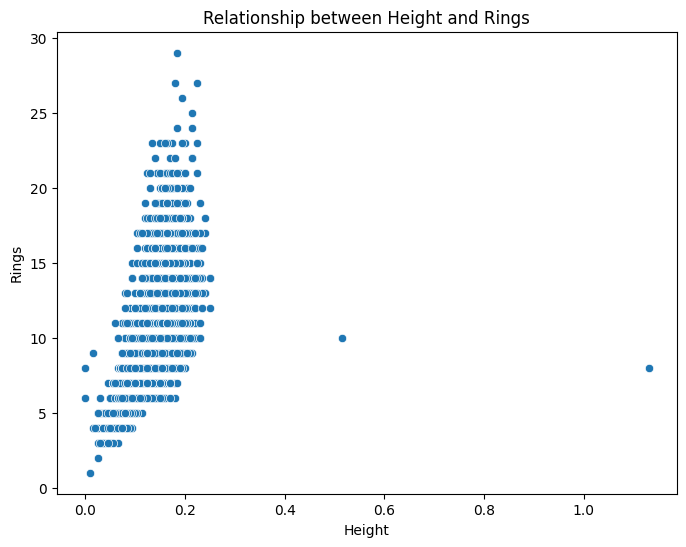

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Rings', data=df)
plt.title('Relationship between Height and Rings')
plt.xlabel('Height')
plt.ylabel('Rings')
plt.show()

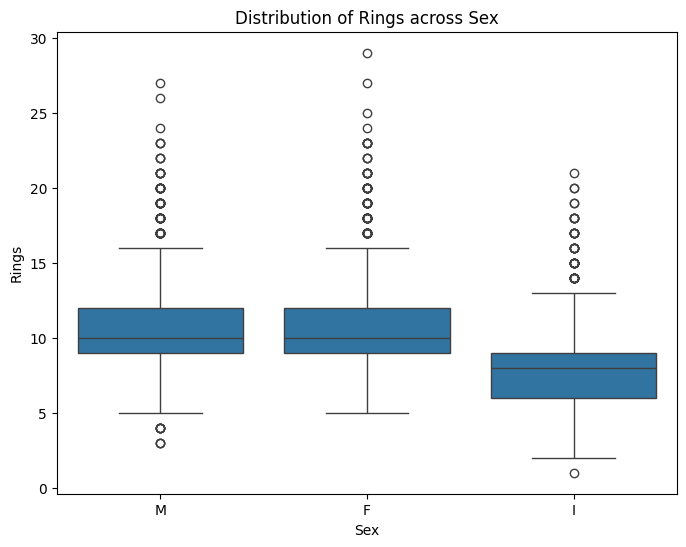

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Rings', data=df)
plt.title('Distribution of Rings across Sex')
plt.xlabel('Sex')
plt.ylabel('Rings')
plt.show()

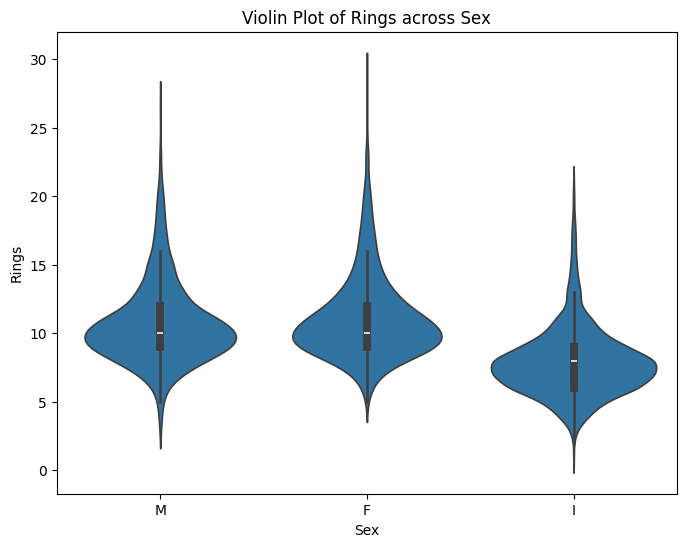

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Rings', data=df)
plt.title('Violin Plot of Rings across Sex')
plt.xlabel('Sex')
plt.ylabel('Rings')
plt.show()

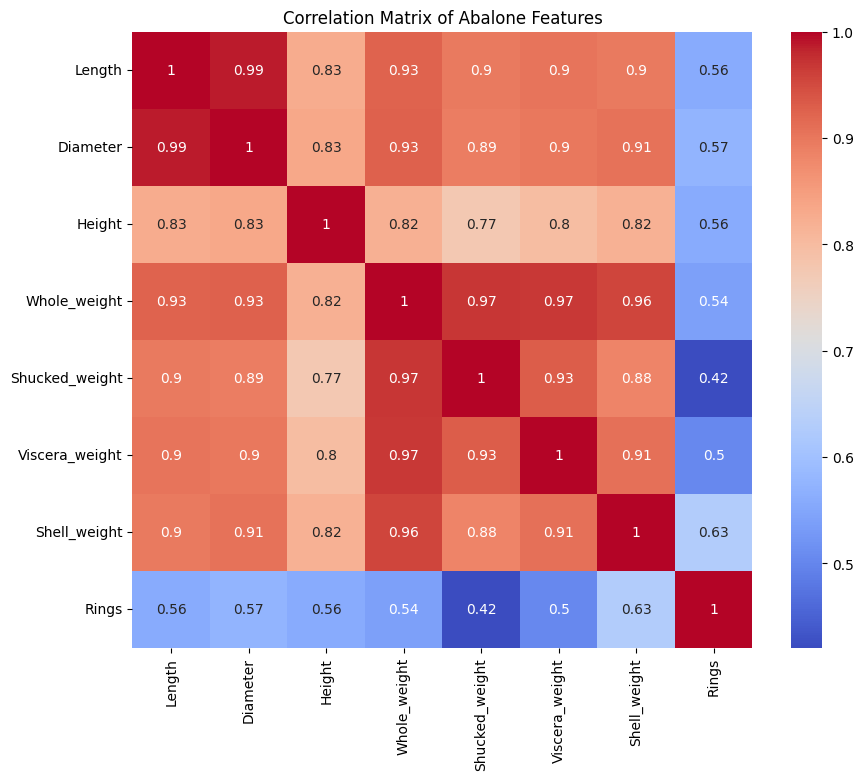

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Sex',axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Abalone Features')
plt.show()

<Figure size 1000x800 with 0 Axes>

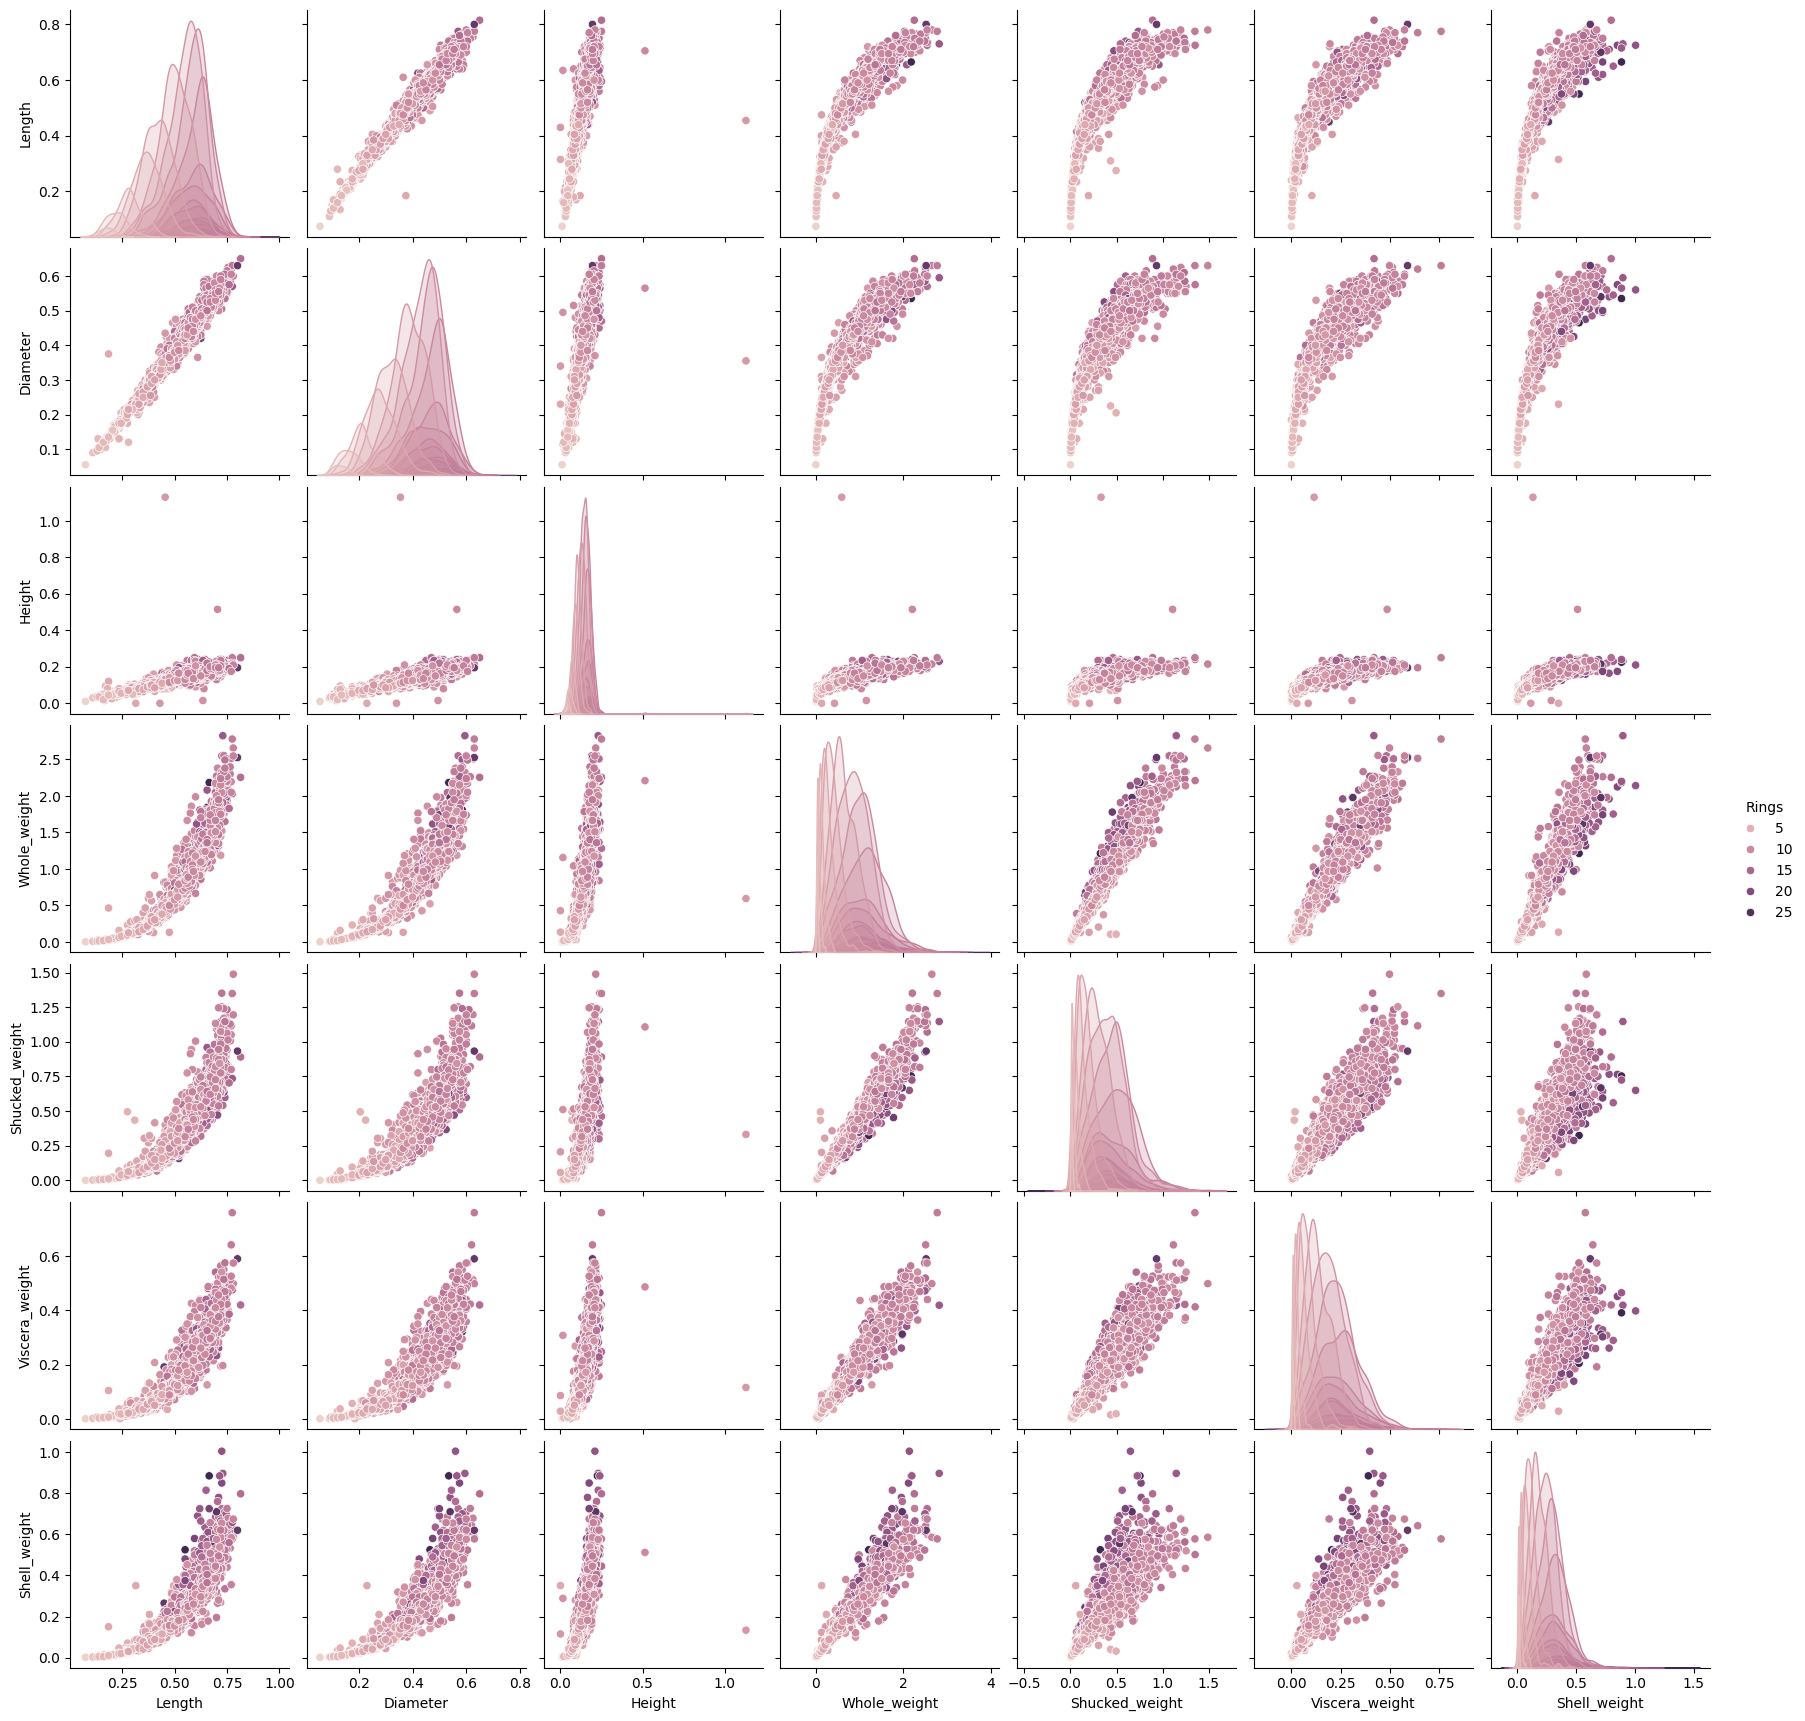

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.pairplot(df.drop('Sex', axis=1), hue='Rings')
plt.show()




Summary of observations from the visualizations:

* **Distribution of Rings:** The `histplot` shows the distribution of the number of rings in abalone.  The distribution appears slightly right-skewed, indicating that most abalones have a moderate number of rings, with fewer having very high ring counts.

* **Relationship between Length/Diameter/Height and Rings:** The scatter plots show the relationship between length, diameter, height and the number of rings.  There's a positive correlation: as length, diameter, and height increase, the number of rings tends to increase.

* **Relationship between Sex and Rings:** The box plot and violin plot illustrate the distribution of rings across different sexes (M, F, I).

* **Correlation Matrix:** The heatmap shows the correlation coefficients between different features (excluding Sex).  It helps to visualize the strength and direction of linear relationships between the features.  For example, Length, Diameter, and Height are highly correlated with each other.  These features also show moderate to strong positive correlation with the number of Rings.


In [18]:
X_encoded = pd.get_dummies(X, columns=['Sex'], drop_first=True)

In [19]:
X_encoded

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,True,False
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,False,False


from matplotlib import pyplot as plt
X_encoded['Length'].plot(kind='hist', bins=20, title='Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_encoded['Diameter'].plot(kind='hist', bins=20, title='Diameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_encoded['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_encoded['Whole_weight'].plot(kind='hist', bins=20, title='Whole_weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X_encoded.groupby('Sex_I').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X_encoded.groupby('Sex_M').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_encoded.plot(kind='scatter', x='Length', y='Diameter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_encoded.plot(kind='scatter', x='Diameter', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_encoded.plot(kind='scatter', x='Height', y='Whole_weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_encoded.plot(kind='scatter', x='Whole_weight', y='Shucked_weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_encoded['Length'].plot(kind='line', figsize=(8, 4), title='Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_encoded['Diameter'].plot(kind='line', figsize=(8, 4), title='Diameter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_encoded['Height'].plot(kind='line', figsize=(8, 4), title='Height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_encoded['Whole_weight'].plot(kind='line', figsize=(8, 4), title='Whole_weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sex_M'].value_counts()
    for x_label, grp in X_encoded.groupby('Sex_I')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex_I')
_ = plt.ylabel('Sex_M')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X_encoded['Sex_I'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_encoded, x='Length', y='Sex_I', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X_encoded['Sex_M'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_encoded, x='Length', y='Sex_M', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X_encoded['Sex_I'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_encoded, x='Diameter', y='Sex_I', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X_encoded['Sex_M'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_encoded, x='Diameter', y='Sex_M', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

# Model-1 (MLP Regressor)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



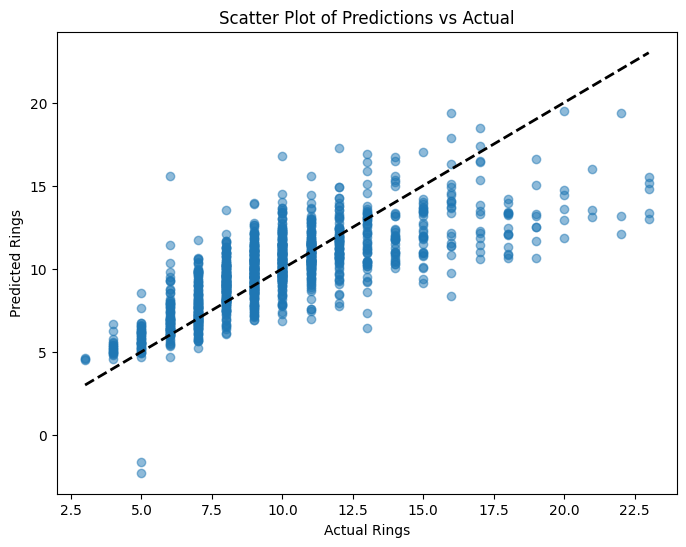

In [25]:
regr = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu',
                    solver='adam', random_state=42, max_iter=500)
regr.fit(X_train, y_train)

# Predict using the trained model
y_pred = regr.predict(X_test)

# 1. Scatter Plot of Predictions vs Actual:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Scatter Plot of Predictions vs Actual')
plt.show()

In [55]:
regr

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import numpy as np
# Assuming you have y_test (actual values) and y_pred (predicted values)
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# 3. R-squared (R2)
r2 = r2_score(y_test, y_pred)
# 4. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# 5. Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score: {explained_variance}")

Mean Squared Error (MSE): 4.598689261444547
Root Mean Squared Error (RMSE): 2.144455469680951
R-squared (R2): 0.5471305074352923
Mean Absolute Error (MAE): 1.5361903909020411
Explained Variance Score: 0.5483116304119674


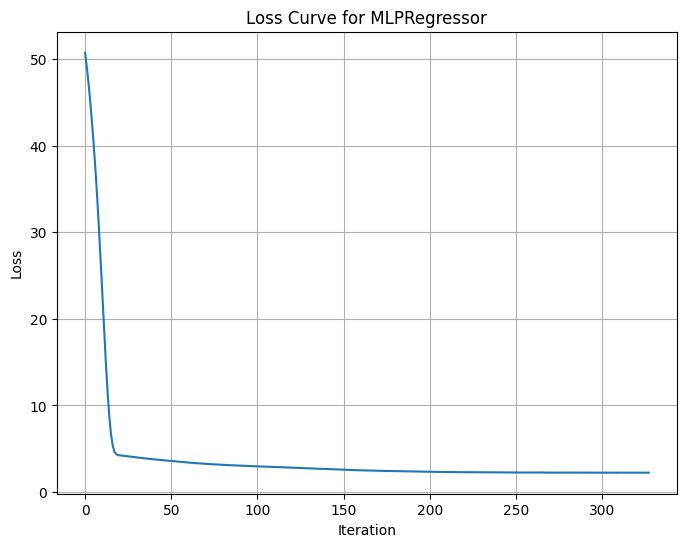

In [26]:
# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(regr.loss_curve_)
plt.title('Loss Curve for MLPRegressor')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Model-2 (Artificial Neural Network - ANN)

In [38]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Adjust input shape
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=0)  # Add validation_split


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,597 (57.02 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,732 (38.02 KB)

In [39]:
# Predict using the trained model
y_pred1 = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


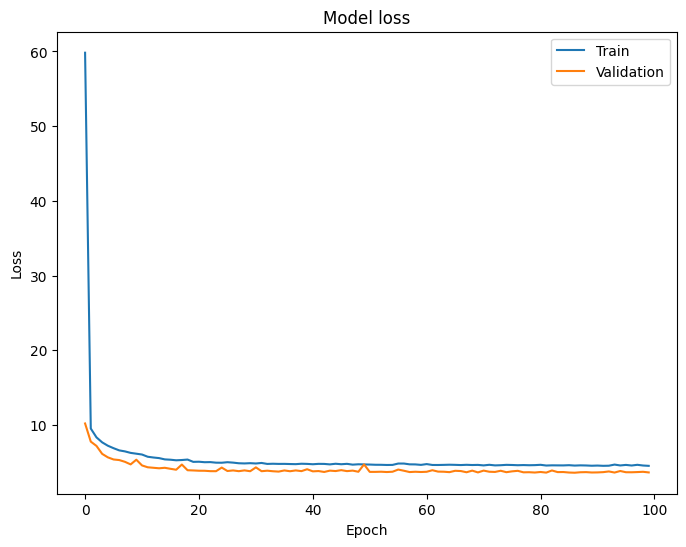

In [41]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the training history in 'history'

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [44]:
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)
# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# 3. R-squared (R2)
r2 = r2_score(y_test, y_pred1)
# 4. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred1)
# 5. Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred1)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score: {explained_variance}")

Mean Squared Error (MSE): 4.467774391174316
Root Mean Squared Error (RMSE): 2.1137110472281484
R-squared (R2): 0.5600227117538452
Mean Absolute Error (MAE): 1.4758142232894897
Explained Variance Score: 0.5657710409908511


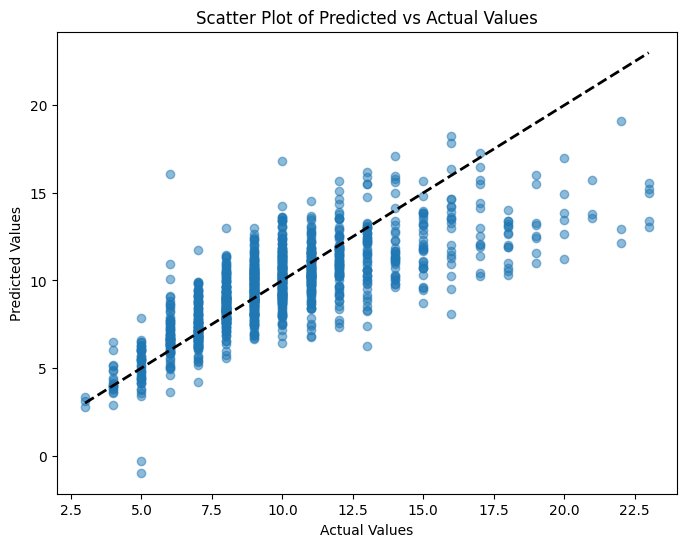

In [45]:
import matplotlib.pyplot as plt

# Assuming you have y_test (actual values) and y_pred (predicted values)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1, alpha=0.5)  # Alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Model-3 (SVR)

In [56]:
from sklearn.svm import SVR

# Train SVR model
svr = SVR(kernel='rbf', C=10, epsilon=0.01, gamma=0.1)
svr.fit(X_train, y_train)
y_pred2 = svr.predict(X_test)

# Select a relevant feature for plotting (e.g., 'Length')
feature_index = X_train.columns.get_loc('Length')  # Replace 'Length' with your desired feature
X_test_feature = X_test.iloc[:, feature_index].values  # Extract feature values as a NumPy array


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



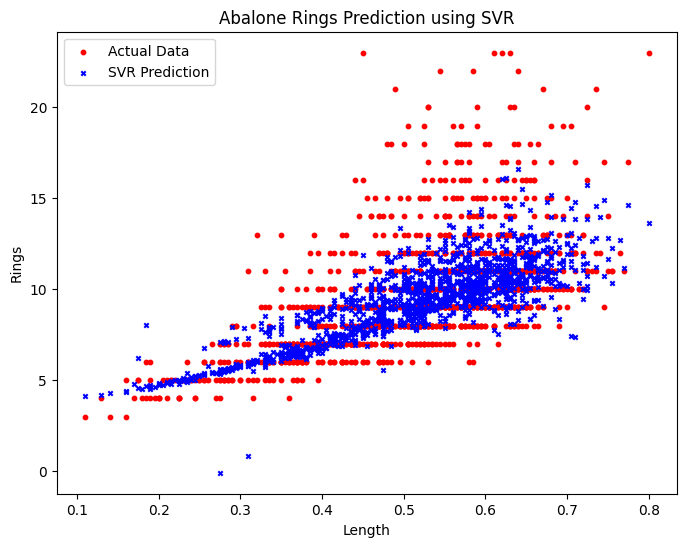

In [57]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_test_feature, y_test, color='red', label='Actual Data', s=10)  # Plot actual data points
plt.scatter(X_test_feature, y_pred2, color='blue', label='SVR Prediction',s=10,marker='x')  # Plot SVR predictions as a line
plt.legend()
plt.xlabel("Length")  # Replace with your selected feature name
plt.ylabel("Rings")
plt.title("Abalone Rings Prediction using SVR")
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import numpy as np
# Assuming you have y_test (actual values) and y_pred2 (SVR predicted values)
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)
# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# 3. R-squared (R2)
r2 = r2_score(y_test, y_pred2)
# 4. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred2)
# 5. Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred2)
# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score: {explained_variance}")

Mean Squared Error (MSE): 4.841841779596544
Root Mean Squared Error (RMSE): 2.200418546458047
R-squared (R2): 0.5231853458357596
Mean Absolute Error (MAE): 1.5102225197178685
Explained Variance Score: 0.5349483908519734
